In [2]:
from IPython.display import display, Image
import matplotlib.pyplot as plt
import numpy as np

In [3]:
mmHg=0.00075

# Oscillating flow in one vessel

## Equations

$$
    \begin{aligned}
  \partial_s Q(s,t) &= - \partial_t A(t) \\
 \partial_t Q(s,t) +\frac{A(t)}{\rho}\partial_s P(s,t)&=-\frac{c_f \nu }{h(t)^2}Q(s,t) 
    \end{aligned}
$$

with $Q(s,t)$ and $P(s,t)$ respectively the flow through the cross-sectional area and the fluid pressure at the location $s$, $\rho$ the fluid density and $\nu$ the fluid kinematic viscosity and $c_f$ a coefficient in the friction term which depends on the shape of the channel.In the case of a cylindrical channel $c_f=8$ and in the case of a hollow channel $c_f=12$.


#### Parameters

In [4]:
l=500e-4 #cm
rho=1
cf=12 # Hollow cylinder case
nu=7e-3

#### Imposed wall deformation

Let the aperture lenght $h(t)$ be a periodic oscillation with a period $T$. We chose the expressions

$$h(t)=h_{0}(1+a \cos(\omega t )) = \Re (h_{0}(1+a \exp(i \omega t )))$$

with $\omega = 2 \pi /T$, $h_{0}$ being the mean aperture length, $a$ the amplitude ratio of the deformation which is a real number.


In [5]:
h0=10e-4 # cm
a=0.1 # We impose that there is no phase shift, so a is real.
T=1
w=2*np.pi/T

h=lambda t :np.real(h0*(1+a*np.exp(1j*w*t)))

Text(0, 0.5, 'Aperture length h (cm)')

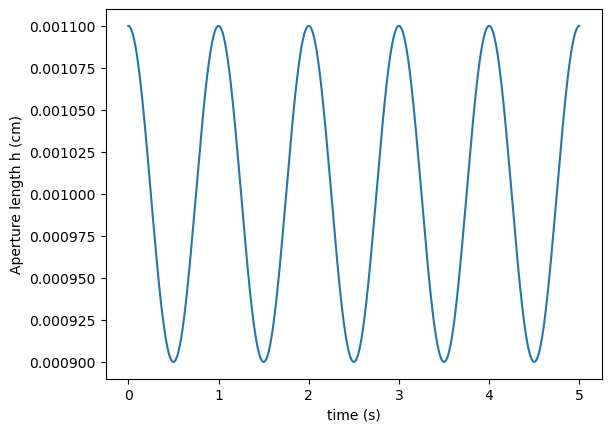

In [6]:
spanTimes=np.arange(0,5*T,0.001)

plt.plot(spanTimes,h(spanTimes))
plt.xlabel('time (s)')
plt.ylabel('Aperture length h (cm)')

The cross-sectional area is
$$
\label{eq:area}
    A(t)= A_0 \Re (1+na e^{i \omega t})
$$
with $n=1$ or $n=2$ if the channel shape is an hollow cylinder or a full cylinder respectively, and $A_0$ the average cross-sectional area.


In [7]:
R=20e-4
n=2 # Hollow cylinder case
A0=2*np.pi*R*h0 # Hollow cylinder case

A=lambda t :np.real(A0*(1+n*a*np.exp(1j*w*t)))
dAdt=lambda t : np.real(A0*(1j*w*n*a*np.exp(1j*w*t)))
dAdt2=lambda t : np.real(A0*(-w**2*n*a*np.exp(1j*w*t)))

In [8]:
spanTimes=np.arange(0,5*T,0.001)

plt.plot(spanTimes,A(spanTimes))
plt.xlabel('time (s)')
plt.ylabel('CSF cross section area (cm^2)')

Text(0, 0.5, 'CSF cross section area (cm^2)')

#### Flow and pressure change along the vessel

We assume that the flow at the entrance of the channel  $Q_{in}(t)$ and the pressure at the outlet of the channel $P_{out}(t)$ are known.


The flow in the channel has a linear form and is given by the equation 
\begin{equation}
Q(s,t)= - \partial_t A(t) s + Q_{in}(t)
\end{equation}


The pressure has a parabolic form and is given by the equation 

\begin{equation}
P(s,t)=\left[ R(t) \partial_t A(t) + L(t) \partial_t^2 A(t) \right ] (\frac{s^2}{2} - \frac{l^2}{2} )-\left[ L(t)\partial_t Q_{in}(t) + R(t)Q_{in}(t) \right](s-l) + P_{out}  
\end{equation}


The expression of pressure and flux change along the vessel are

$$
   \label{eq:PQchange}
   \begin{aligned}
       Q_{out}(t)-Q_{in}(t)&=- \partial_t A(t) \ell \\
P_{out}(t) - P_{in}(t)&=\left[ R(t) \partial_t A(t) + L(t) \partial_t^2 A(t) \right ] \frac{\ell^2}{2} -\left[ R(t)Q_{in}(t)  +L(t)\partial_t Q_{in}(t)\right]\ell  
   \end{aligned}
$$


For the oscillatory flow it becomes 
  
  $$
   \begin{aligned}
       Q_{out}(t)-Q_{in}(t)&=- \Re ( i \omega \ell \bar{A} n a e^{i \omega t} )\\
P_{out}(t) - P_{in}(t)&=
\Re \left( [- (n a\omega ^2 \rho \frac{\ell ^2}{2} + \frac{c_f\nu \rho }{\bar h ^2\bar A}\ell q_{in}) + i \omega (  n a\frac{ c_f\nu\rho}{\bar h^2}\frac{ \ell ^2}{2} -   \frac{\rho }{\bar A}\ell q_{in} )]e^{i \omega t}\right)
   \end{aligned}
   $$

with $q_{in}$ the complex coefficient in the inflow expression
$$
Q_{in}=\Re (q_{in}\exp(i \omega t ))
$$


## Case no 1 :symetrical problem

We assume $P_{in}=P_{out}=0$.

The inflow corresponds to half of the moved fluid by the moving wall

$$Q_{in}= \partial_t A(t) \frac{l}{2} $$




In [9]:
Qin=lambda t : dAdt(t)*l/2

The imposed complex coefficient in the oscillatory form are 

$$q_{in}= \frac{i A_0\omega n a l}{2}$$
$$p_{out}= 0$$

In [10]:
q_in= A0*1j*w*n*a*l/2
p_out=0*mmHg

Qin_osc=lambda t : np.real(q_in*np.exp(1j*w*t))
Pout_osc=lambda t : np.real(p_out*np.exp(1j*w*t))

Text(0, 0.5, 'Inflow')

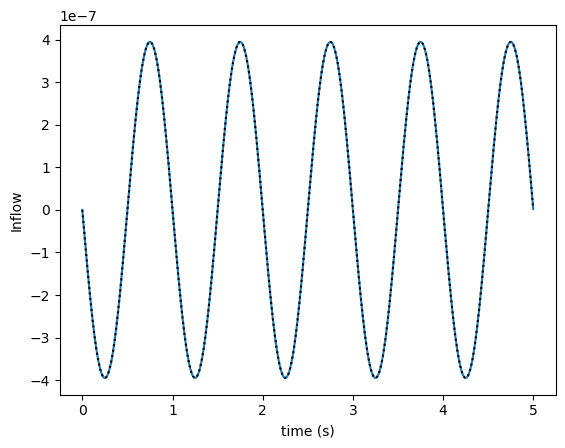

In [11]:
spanTimes=np.arange(0,5*T,0.001)

plt.plot(spanTimes,Qin(spanTimes))
plt.plot(spanTimes,Qin_osc(spanTimes),'k:')
plt.xlabel('time (s)')
plt.ylabel('Inflow')

### Flow and pressure profiles

In [12]:
dQindt=lambda t : dAdt2(t)*l/2

In [13]:
R= lambda t : cf*nu*rho/(h(t)**2*A(t))
L=lambda t : rho/A(t)

In [14]:
Q=lambda s , t : -dAdt(t)*s+Qin(t)
P=lambda s , t : (R(t)*dAdt(t) + L(t)*dAdt2(t))*(s**2/2-l**2/2)-(R(t)*Qin(t) + L(t)*dQindt(t))*(s-l)+Pout_osc(t)

#### Flow spacial profiles

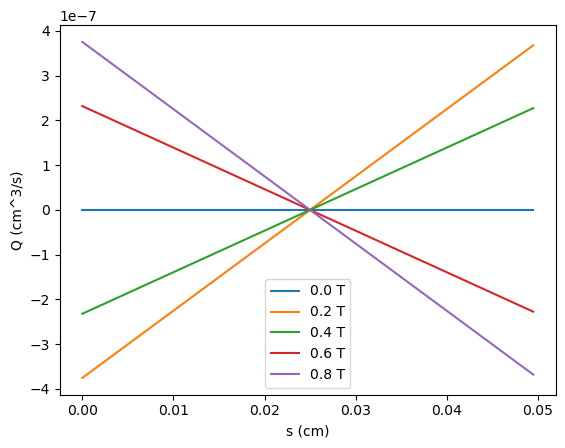

In [15]:
spanS=np.arange(0,l,l/100)


for t in np.arange(0,1,0.2)*T :
    plt.plot(spanS,Q(spanS,t),label='%.1f T'%(t/T))
    
plt.xlabel('s (cm)')
plt.ylabel('Q (cm^3/s)')

plt.legend()

#### Outflow timeseries

In [16]:
# Outflow from oscillatory expression 
DQ=A0*1j*w*n*a*l
Qout_osc= lambda t : np.real((q_in-DQ)*np.exp(1j*w*t))

Text(0, 0.5, 'Outflow')

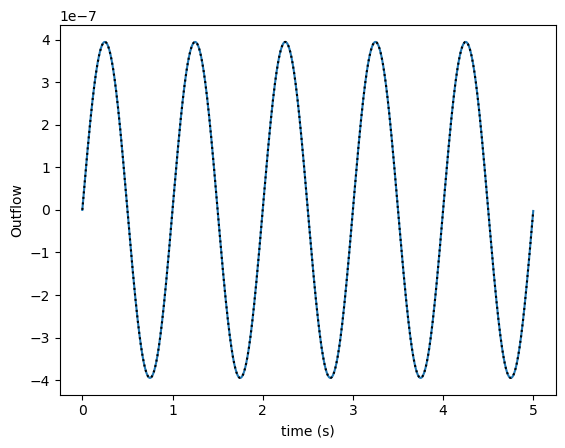

In [17]:
plt.plot(spanTimes,Q(l,spanTimes))
plt.plot(spanTimes,Qout_osc(spanTimes),'k:')
plt.xlabel('time (s)')
plt.ylabel('Outflow')

#### Pressure spacial profiles

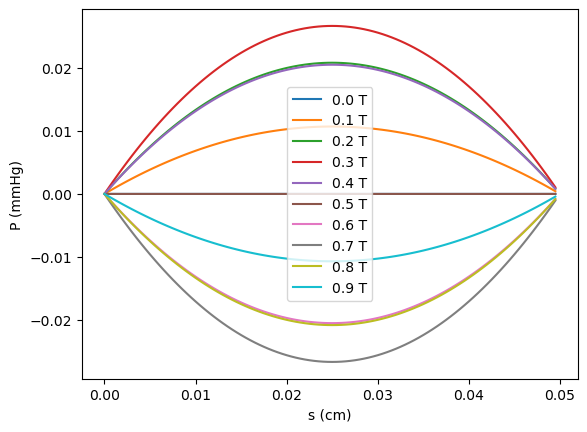

In [18]:
spanS=np.arange(0,l,l/100)

for t in np.arange(0,1,0.1)*T :
    plt.plot(spanS,P(spanS,t)*mmHg,label='%.1f T'%(t/T))
    
plt.xlabel('s (cm)')
plt.ylabel('P (mmHg)')

plt.legend()

In [19]:
# Inlet pressure from the oscillatory expression
T1 = -n * a * w**2 * rho  * l**2 / 2  
T2 = - cf * nu * rho / h0**2 / A0 * l * q_in
T3 = 1j * w * n * a * (cf * nu * rho / h0**2) * (l**2 / 2)  
T4 = - 1j * w * rho / A0 * l * q_in

DP = (T1 + T4 ) + (T2 + T3)
Pin_osc=lambda t : np.real((p_out-DP)* np.exp(1j * w * t))

(-1.5421256876702128e-06, 1.5421256876702128e-06)

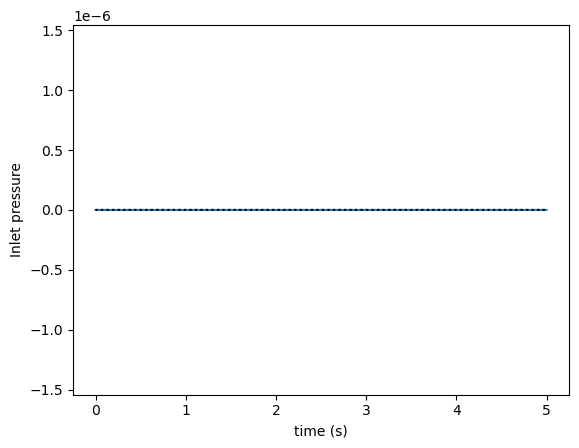

In [20]:
plt.plot(spanTimes,P(0,spanTimes)*mmHg)
plt.plot(spanTimes,Pin_osc(spanTimes)*mmHg,'k:')
plt.xlabel('time (s)')
plt.ylabel('Inlet pressure')
plt.ylim([-max(P(spanS,0))*mmHg,max(P(spanS,0))*mmHg])

## Case no 2 : zero inflow and zero outlet pressure

### Flow and pressure profiles

In [21]:
q_in= 0
p_out=0

Qin_osc=lambda t : np.real(q_in*np.exp(1j*w*t))
Pout_osc=lambda t : np.real(p_out*np.exp(1j*w*t))

In [22]:
Qin=lambda t : 0
dQindt=lambda t : 0

In [23]:
R= lambda t : cf*nu*rho/(h(t)**2*A(t))
L=lambda t : rho/A(t)

In [24]:
Q=lambda s , t : -dAdt(t)*s+Qin(t)
P=lambda s , t : (R(t)*dAdt(t) + L(t)*dAdt2(t))*(s**2/2-l**2/2)-(R(t)*Qin(t) + L(t)*dQindt(t))*(s-l)+Pout_osc(t)

#### Flow spacial profiles

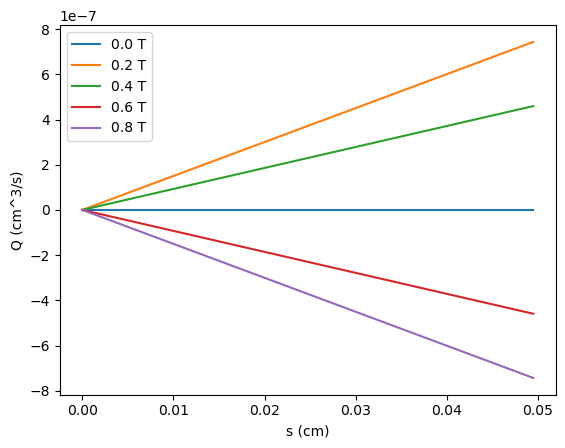

In [25]:
spanS=np.arange(0,l,l/100)


for t in np.arange(0,1,0.2)*T :
    plt.plot(spanS,Q(spanS,t),label='%.1f T'%(t/T))
    
plt.xlabel('s (cm)')
plt.ylabel('Q (cm^3/s)')

plt.legend()

#### Outflow timeseries

The change of flow along the channel is given by 

$$Q_{out}(t)-Q_{in}(t)=- \Re ( i \omega \ell \bar{A} n a e^{i \omega t} )$$

In [26]:
# Outflow from oscillatory expression 
DQ=A0*1j*w*n*a*l
Qout_osc= lambda t : np.real((q_in-DQ)*np.exp(1j*w*t))

We have a good agreement between the full solution and the solution using the complex coefficient in the oscillaroty form.

Text(0, 0.5, 'Outflow')

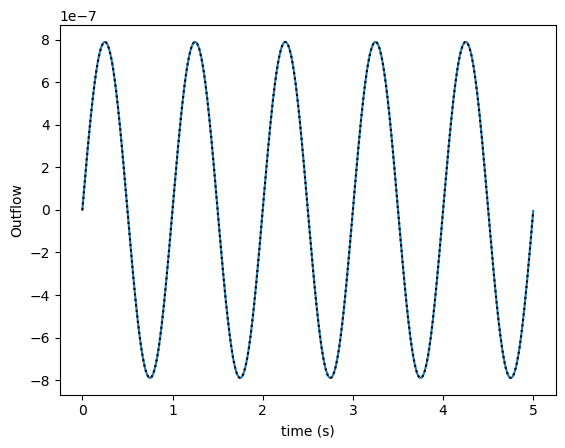

In [27]:
plt.plot(spanTimes,Q(l,spanTimes))
plt.plot(spanTimes,Qout_osc(spanTimes),'k:')
plt.xlabel('time (s)')
plt.ylabel('Outflow')

#### Pressure spacial profiles

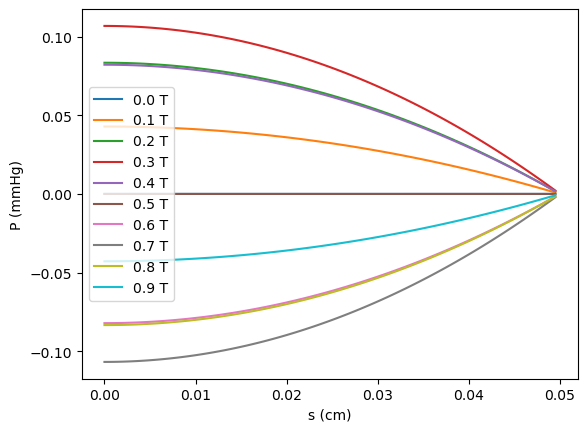

In [28]:
spanS=np.arange(0,l,l/100)

for t in np.arange(0,1,0.1)*T :
    plt.plot(spanS,P(spanS,t)*mmHg,label='%.1f T'%(t/T))
    
plt.xlabel('s (cm)')
plt.ylabel('P (mmHg)')

plt.legend()

Assuming a small amplitude of channel wall deformation $a$, the oscillating change of pressure along the channel is given by   
  $$
P_{out}(t) - P_{in}(t)=
\Re \left( [- (n a\omega ^2 \rho \frac{\ell ^2}{2} + \frac{c_f\nu \rho }{\bar h ^2\bar A}\ell q_{in}) + i \omega (  n a\frac{ c_f\nu\rho}{\bar h^2}\frac{ \ell ^2}{2} -   \frac{\rho }{\bar A}\ell q_{in} )]e^{i \omega t}\right)
   $$

In [29]:
# Inlet pressure from the oscillatory expression
T1 = -n * a * w**2 * rho  * l**2 / 2  
T2 = - cf * nu * rho / h0**2 / A0 * l * q_in
T3 = 1j * w * n * a * (cf * nu * rho / h0**2) * (l**2 / 2)  
T4 = - 1j * w * rho / A0 * l * q_in

DP = (T1 + T4 ) + (T2 + T3)
Pin_osc=lambda t : np.real((p_out-DP)* np.exp(1j * w * t))

T1_osc=lambda t : np.real(T1* np.exp(1j * w * t))
T2_osc=lambda t : np.real(T2* np.exp(1j * w * t))
T3_osc=lambda t : np.real(T3* np.exp(1j * w * t))
T4_osc=lambda t : np.real(T4* np.exp(1j * w * t))

In [30]:
def T1_full (t) :
       
    T1=L(t)*dAdt2(t)

    return np.real(T1*l**2/2)

def T2_full (t) :
    
    return np.real(-R(t)*Qin(t)*l)

def T3_full (t) :
        
    T3=R(t)*dAdt(t)

    return np.real(T3*l**2/2)

def T4_full (t) :
    
    return np.real(L(t)*dQindt(t)*l)

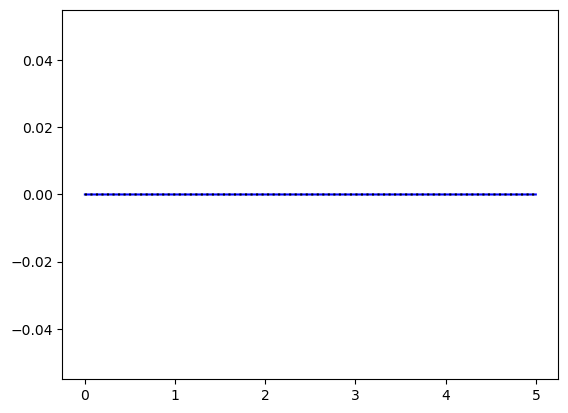

In [31]:
plt.plot(spanTimes,T4_full(spanTimes)*mmHg,'b')
plt.plot(spanTimes,T4_osc(spanTimes)*mmHg,'k:')

#### Comparison of the full solution for the inlet pressure and the first order oscillatory solution

We notice a good agreement when the coefficient $a$ is small. The discrepency increase as we increase the coefficient $a$.

Text(0, 0.5, 'Inlet pressure')

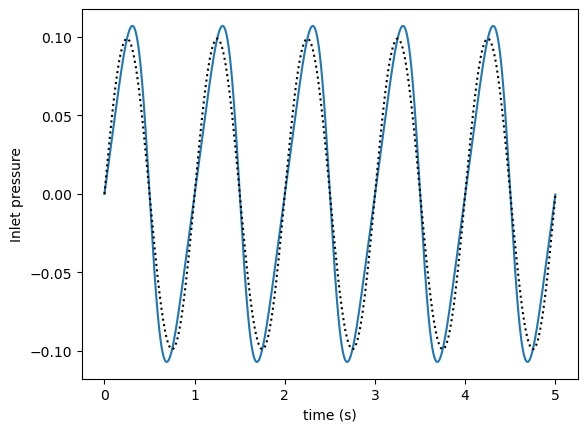

In [32]:
plt.plot(spanTimes,P(0,spanTimes)*mmHg)
plt.plot(spanTimes,Pin_osc(spanTimes)*mmHg,'k:')

plt.xlabel('time (s)')
plt.ylabel('Inlet pressure')

## Case no 3 : oscillating inflow and outlet pressure

### Flow and pressure profiles

In [33]:
q_in= 0.001
p_out= 0.1/mmHg

Qin_osc=lambda t : np.real(q_in*np.exp(1j*w*t))
Pout_osc=lambda t : np.real(p_out*np.exp(1j*w*t))

In [34]:
Qin=lambda t : np.real(q_in*np.exp(1j*w*t))
dQindt=lambda t : np.real(1j*w*q_in*np.exp(1j*w*t))

In [35]:
R= lambda t : cf*nu*rho/(h(t)**2*A(t))
L=lambda t : rho/A(t)

In [36]:
Q=lambda s , t : -dAdt(t)*s+Qin(t)
P=lambda s , t : (R(t)*dAdt(t) + L(t)*dAdt2(t))*(s**2/2-l**2/2)-(R(t)*Qin(t) + L(t)*dQindt(t))*(s-l)+Pout_osc(t)

#### Flow spacial profiles

In [37]:
spanS=np.arange(0,l,l/100)


for t in np.arange(0,1,0.2)*T :
    plt.plot(spanS,Q(spanS,t),label='%.1f T'%(t/T))
    
plt.xlabel('s (cm)')
plt.ylabel('Q (cm^3/s)')

plt.legend()

#### Outflow timeseries

The change of flow along the channel is given by 

$$Q_{out}(t)-Q_{in}(t)=- \Re ( i \omega \ell \bar{A} n a e^{i \omega t} )$$

In [38]:
# Outflow from oscillatory expression 
DQ=A0*1j*w*n*a*l
Qout_osc= lambda t : np.real((q_in-DQ)*np.exp(1j*w*t))

We have a good agreement between the full solution and the solution using the complex coefficient in the oscillaroty form.

Text(0, 0.5, 'Outflow')

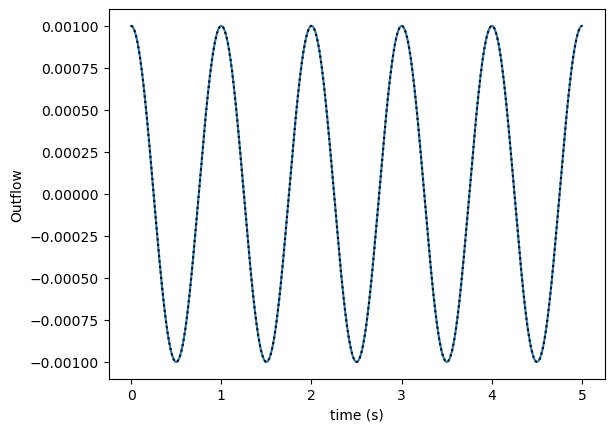

In [39]:
plt.plot(spanTimes,Q(l,spanTimes))
plt.plot(spanTimes,Qout_osc(spanTimes),'k:')
plt.xlabel('time (s)')
plt.ylabel('Outflow')

#### Pressure spacial profiles

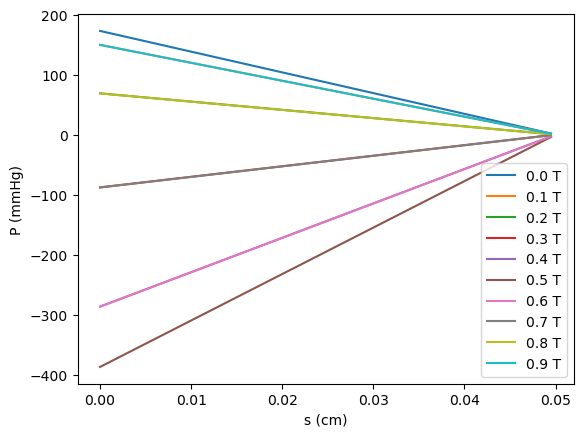

In [40]:
spanS=np.arange(0,l,l/100)

for t in np.arange(0,1,0.1)*T :
    plt.plot(spanS,P(spanS,t)*mmHg,label='%.1f T'%(t/T))
    
plt.xlabel('s (cm)')
plt.ylabel('P (mmHg)')

plt.legend()

Assuming a small amplitude of channel wall deformation $a$, the oscillating change of pressure along the channel is given by   
  $$
P_{out}(t) - P_{in}(t)=
\Re \left( [- (n a\omega ^2 \rho \frac{\ell ^2}{2} + \frac{c_f\nu \rho }{\bar h ^2\bar A}\ell q_{in}) + i \omega (  n a\frac{ c_f\nu\rho}{\bar h^2}\frac{ \ell ^2}{2} -   \frac{\rho }{\bar A}\ell q_{in} )]e^{i \omega t}\right)
   $$

In [41]:
# Inlet pressure from the oscillatory expression
T1 = -n * a * w**2 * rho  * l**2 / 2  
T2 = - cf * nu * rho / h0**2 / A0 * l * q_in
T3 = 1j * w * n * a * (cf * nu * rho / h0**2) * (l**2 / 2)  
T4 = - 1j * w * rho / A0 * l * q_in

DP = (T1 + T4 ) + (T2 + T3)
Pin_osc=lambda t : np.real((p_out-DP)* np.exp(1j * w * t))

T1_osc=lambda t : np.real(T1* np.exp(1j * w * t))
T2_osc=lambda t : np.real(T2* np.exp(1j * w * t))
T3_osc=lambda t : np.real(T3* np.exp(1j * w * t))
T4_osc=lambda t : np.real(T4* np.exp(1j * w * t))

In [42]:
def T1_full (t) :
       
    T1=L(t)*dAdt2(t)

    return np.real(T1*l**2/2)

def T2_full (t) :
    
    return np.real(-R(t)*Qin(t)*l)

def T3_full (t) :
        
    T3=R(t)*dAdt(t)

    return np.real(T3*l**2/2)

def T4_full (t) :
    
    return np.real(-L(t)*dQindt(t)*l)

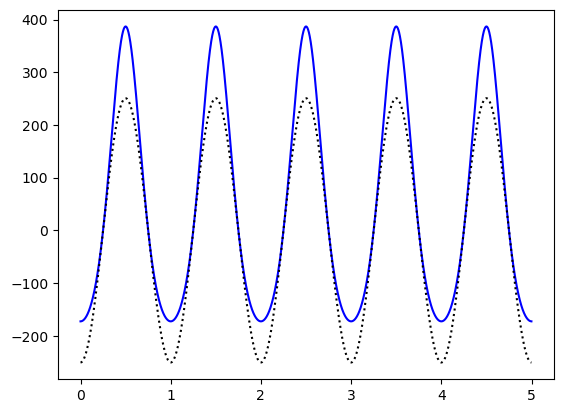

In [43]:
plt.plot(spanTimes,T2_full(spanTimes)*mmHg,'b')
plt.plot(spanTimes,T2_osc(spanTimes)*mmHg,'k:')

#### Comparison of the full solution for the inlet pressure and the first order oscillatory solution

We notice a good agreement when the coefficient $a$ is small. The discrepency increase as we increase the coefficient $a$.

Text(0, 0.5, 'Inlet pressure')

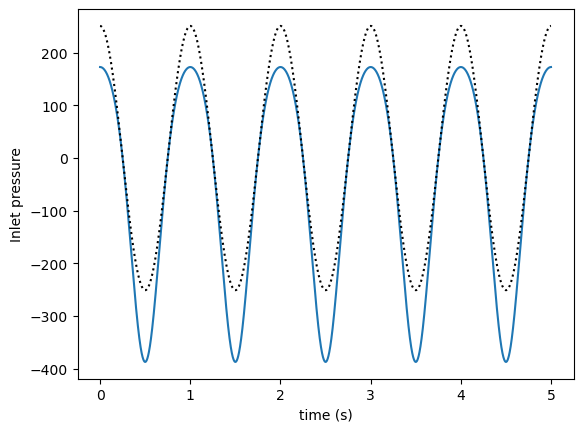

In [44]:
plt.plot(spanTimes,P(0,spanTimes)*mmHg)
plt.plot(spanTimes,Pin_osc(spanTimes)*mmHg,'k:')

plt.xlabel('time (s)')
plt.ylabel('Inlet pressure')